In [ ]:
!pip install yfinance

In [ ]:
from sklearn.decomposition import PCA
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [20]:
from data_query import fetch_NASDAQ100_index
from data_query import fetch_NASDAQ100_all_components
from data_query import fetch_SP500_index
from data_query import fetch_SP500_all_components
from data_query import fetch_ftse100_index
from data_query import fetch_ftse100_all_components
from PCA_function import rolling_pca_weights
from preprocessing import preprocessing_X
from sklearn.decomposition import PCA
from typing import List

In [3]:
import sys
import os
sys.path.append(os.path.abspath("../app"))
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/home/sb/lewagon_london/project_lewagon/stock-stat-replica/data/lewagon-statistical-arbitrage-ae470f7dcd48.json'


In [19]:
# from main import compute_bt_result
# bt_result,rep_pf=compute_bt_result(30,30,30,30,4,[0.5, 2, -0.5, -2],'SP500')


In [ ]:
index_selected='FTSE100'
if index_selected=='NASDAQ100':
    target_df= fetch_NASDAQ100_index()
    underlying_df=fetch_NASDAQ100_all_components()
elif index_selected=='SP500':
    target_df= fetch_SP500_index()
    underlying_df=fetch_SP500_all_components()
elif index_selected=='FTSE100':
    target_df= fetch_ftse100_index()
    underlying_df=fetch_ftse100_all_components()

n_stocks = 30               # number of stocks used for the replication
window = 30                 # period the trading strat goes
n_pcs = 3   
if 'date' in underlying_df.columns and not underlying_df['date'].empty:
    underlying_df.set_index('date', inplace=True)

# Create log returns to remove stationarity
log_returns = np.log(underlying_df / underlying_df.shift(1))

# Drop NaN values caused by the shift
log_returns = log_returns.dropna()
X_log = log_returns.copy()
stock_log_features = X_log.columns

# Scaling data
scaler = StandardScaler()
scaler.fit(X_log)
X_log = pd.DataFrame(scaler.transform(X_log), columns=stock_log_features, index=log_returns.index)

rep_pf = rolling_pca_weights(X_log, n_stocks, window, n_pcs)

In [77]:
rep_pf

,AHT,ALW,BATS,BEZ,BNZL,CPG,DPLM,ENT,EXPN,FCIT,...,REL,RIO,RKT,SGE,SMIN,SN,SPX,STJ,TW,ULVR
date,,,,,,,,,,,,,,,,,,,,,
2024-03-18,0.027114,0.024144,0.047054,0.045078,0.021408,0.023172,0.026786,0.023773,0.027177,0.018154,...,0.038597,0.019963,0.136558,0.033505,0.019371,0.031371,0.022605,0.056173,0.022574,0.028399


In [37]:
daily_weights_df=rep_pf.copy()
daily_weights_df

,AAF,AAL,ABF,ADM,AHT,ALW,ANTO,AUTO,AV,AZN,...,SVT,TSCO,TW,ULVR,UTG,UU,VOD,WEIR,WPP,WTB
date,,,,,,,,,,,,,,,,,,,,,
2022-03-16,0.000000,0.0,0.000000,0.034438,0.035694,0.025299,0.000000,0.031097,0.000000,0.000000,...,0.000000,0.000000,0.025374,0.000000,0.025995,0.000000,0.000000,0.053511,0.000000,0.000000
2022-03-17,0.000000,0.0,0.038887,0.000000,0.000000,0.000000,0.000000,0.000000,0.032751,0.000000,...,0.000000,0.000000,0.000000,0.031526,0.000000,0.000000,0.000000,0.000000,0.032779,0.020963
2022-03-18,0.000000,0.0,0.039764,0.000000,0.000000,0.000000,0.000000,0.000000,0.032266,0.000000,...,0.000000,0.000000,0.000000,0.028702,0.000000,0.000000,0.000000,0.000000,0.033973,0.021611
2022-03-21,0.000000,0.0,0.039276,0.000000,0.000000,0.000000,0.000000,0.000000,0.032757,0.000000,...,0.000000,0.000000,0.000000,0.028750,0.000000,0.000000,0.000000,0.000000,0.034111,0.021394
2022-03-22,0.035390,0.0,0.000000,0.043168,0.000000,0.000000,0.000000,0.000000,0.027078,0.029024,...,0.000000,0.000000,0.000000,0.023753,0.025603,0.000000,0.000000,0.056879,0.038497,0.020763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,0.025841,0.0,0.026043,0.000000,0.029796,0.034330,0.000000,0.000000,0.028601,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028196,0.000000,0.000000
2025-03-05,0.000000,0.0,0.000000,0.000000,0.030581,0.032144,0.000000,0.000000,0.027354,0.000000,...,0.000000,0.000000,0.000000,0.034242,0.000000,0.000000,0.029973,0.028977,0.000000,0.024865
2025-03-06,0.040618,0.0,0.031321,0.000000,0.000000,0.037978,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.033347,0.028945,0.032982,0.000000,0.031892,0.000000,0.000000,0.040038,0.000000


In [38]:
daily_weights_df.index=pd.to_datetime(daily_weights_df.index)
daily_weights_df.index


DatetimeIndex(['2022-03-16', '2022-03-17', '2022-03-18', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-28', '2022-03-29',
               ...
               '2025-02-25', '2025-02-26', '2025-02-27', '2025-02-28',
               '2025-03-03', '2025-03-04', '2025-03-05', '2025-03-06',
               '2025-03-07', '2025-03-10'],
              dtype='datetime64[ns]', name='date', length=755, freq=None)

In [41]:
target_df.set_index('date',inplace=True)

In [58]:
df=target_df
df

,FTSE100
date,
2022-02-01,7535.799805
2022-02-02,7583.000000
2022-02-03,7528.799805
2022-02-04,7516.399902
2022-02-07,7573.500000
...,...
2025-03-04,8759.000000
2025-03-05,8755.799805
2025-03-06,8682.799805


In [59]:
# SPREAD CODE:

pca_date = '2024-03-18'

# Filter stocks with values > 0 on the specific date
filtered_columns = daily_weights_df.loc[pca_date][daily_weights_df.loc[pca_date] > 0].index
# replication pf weights taken from output function
rep_pf = daily_weights_df.loc[[pca_date], filtered_columns]

# log returns of rep pf
rep_pf_log_returns_daily = log_returns[rep_pf.columns]

# log return times weights (results)
rep_pf_results = rep_pf_log_returns_daily.mul(rep_pf.iloc[0], axis=1)
rep_pf_results["total_rep_pf"] = rep_pf_results.sum(axis=1)
rep_pf_results

# Calculate log returns FTSE100 / Index    
FTSE_log_return = np.log(df["FTSE100"] / df["FTSE100"].shift(1)).dropna()
FTSE_log_return

# DF of spread
spread_df = pd.DataFrame()  # Create a new DataFrame for the spread
spread_df["spread"] = FTSE_log_return - rep_pf_results["total_rep_pf"]  # Add a column named "spread"
training_spread_df = spread_df.loc[:pca_date].iloc[:-1]  # Data up to the PCA date, excluding the date itself

In [73]:
rep_pf_results

,AHT,ALW,BATS,BEZ,BNZL,CPG,DPLM,ENT,EXPN,FCIT,...,RIO,RKT,SGE,SMIN,SN,SPX,STJ,TW,ULVR,total_rep_pf
date,,,,,,,,,,,,,,,,,,,,,
2022-02-02,0.000457,0.000194,-0.000082,0.000353,0.000299,-0.000021,0.000865,-0.000081,0.000549,-0.000103,...,0.000019,0.001586,0.000601,-0.000012,-0.000075,0.000438,0.000980,0.000362,0.000253,0.008159
2022-02-03,-0.001193,-0.000439,0.000333,-0.000398,-0.000664,0.000914,-0.000485,-0.000476,-0.000986,-0.00027,...,0.000071,-0.001678,-0.001004,-0.000056,-0.000088,-0.000532,-0.001016,-0.000228,0.000157,-0.012225
2022-02-04,-0.0008,-0.000099,0.000301,-0.000678,-0.000071,0.000188,-0.000668,-0.000166,-0.000435,-0.000189,...,-0.000026,-0.004098,0.000057,-0.000249,-0.000088,-0.000327,-0.000830,-0.000456,0.000086,-0.01138
2022-02-07,-0.000376,0.000197,-0.000331,0.000120,0.000039,0.000093,-0.000507,0.000494,0.000267,0.000356,...,0.000547,0.000937,-0.000075,-0.000031,-0.001284,-0.000508,0.000297,0.000113,0.000322,0.002366
2022-02-08,0.000164,-0.000049,0.000747,-0.000314,-0.000063,0.000252,0.000137,-0.000156,-0.000330,0.000083,...,0.000362,-0.001243,-0.000620,-0.000088,0.000404,-0.000249,0.001316,0.000135,0.000132,0.001238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,-0.002329,-0.000973,0.000782,-0.000278,-0.000252,-0.000041,-0.000566,-0.000708,-0.000203,-0.000547,...,-0.000111,0.000414,-0.000725,-0.000337,0.000120,-0.000127,-0.002932,0.000020,0.000484,-0.010789
2025-03-05,0.000741,-0.00004,-0.001162,0.000152,0.000098,-0.000697,0.000024,0.000459,-0.000381,0.000098,...,0.000221,-0.002608,-0.000053,0.000145,-0.000214,0.000441,-0.000432,-0.000030,-0.000490,-0.005913
2025-03-06,0.000292,0.000119,0.000213,0.000177,-0.000212,-0.000912,-0.000417,-0.000394,-0.000491,0.000032,...,-0.000465,0.002815,-0.000920,-0.000058,-0.000364,0.000448,0.000378,-0.000275,0.000000,-0.004537


In [60]:
training_spread_df

,spread
date,
2022-02-02,-0.001915
2022-02-03,0.005052
2022-02-04,0.009731
2022-02-07,0.005202
2022-02-08,-0.002083
...,...
2024-03-11,0.00242
2024-03-12,-0.002849
2024-03-13,0.005767


In [61]:
from data_query  import eco_df
bg_data=eco_df()
eco_df=bg_data.copy()

In [62]:
eco_df.isna().sum()

Date       0
COF       30
GBPUSD     0
GF        30
FVX       31
SP500     31
TNX       31
VIX       31
dtype: int64

In [63]:
eco_df.fillna(method='ffill', inplace=True)


/tmp/ipykernel_715906/3995343485.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  eco_df.fillna(method='ffill', inplace=True)


[*********************100%***********************]  7 of 7 completed
/home/sb/.pyenv/versions/3.10.6/envs/stockify_env/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 1.1121 - val_loss: 1.5623
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9091 - val_loss: 1.5572
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.1366 - val_loss: 1.5526
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.1300 - val_loss: 1.5485
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0596 - val_loss: 1.5439
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.9899 - val_loss: 1.5396
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.9918 - val_loss: 1.5370
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9198 - val_loss: 1.5337
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0017 - val_loss: 1.5309
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.0128 - val_loss: 1.5287
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 1.1576 - val_loss: 1.5262
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

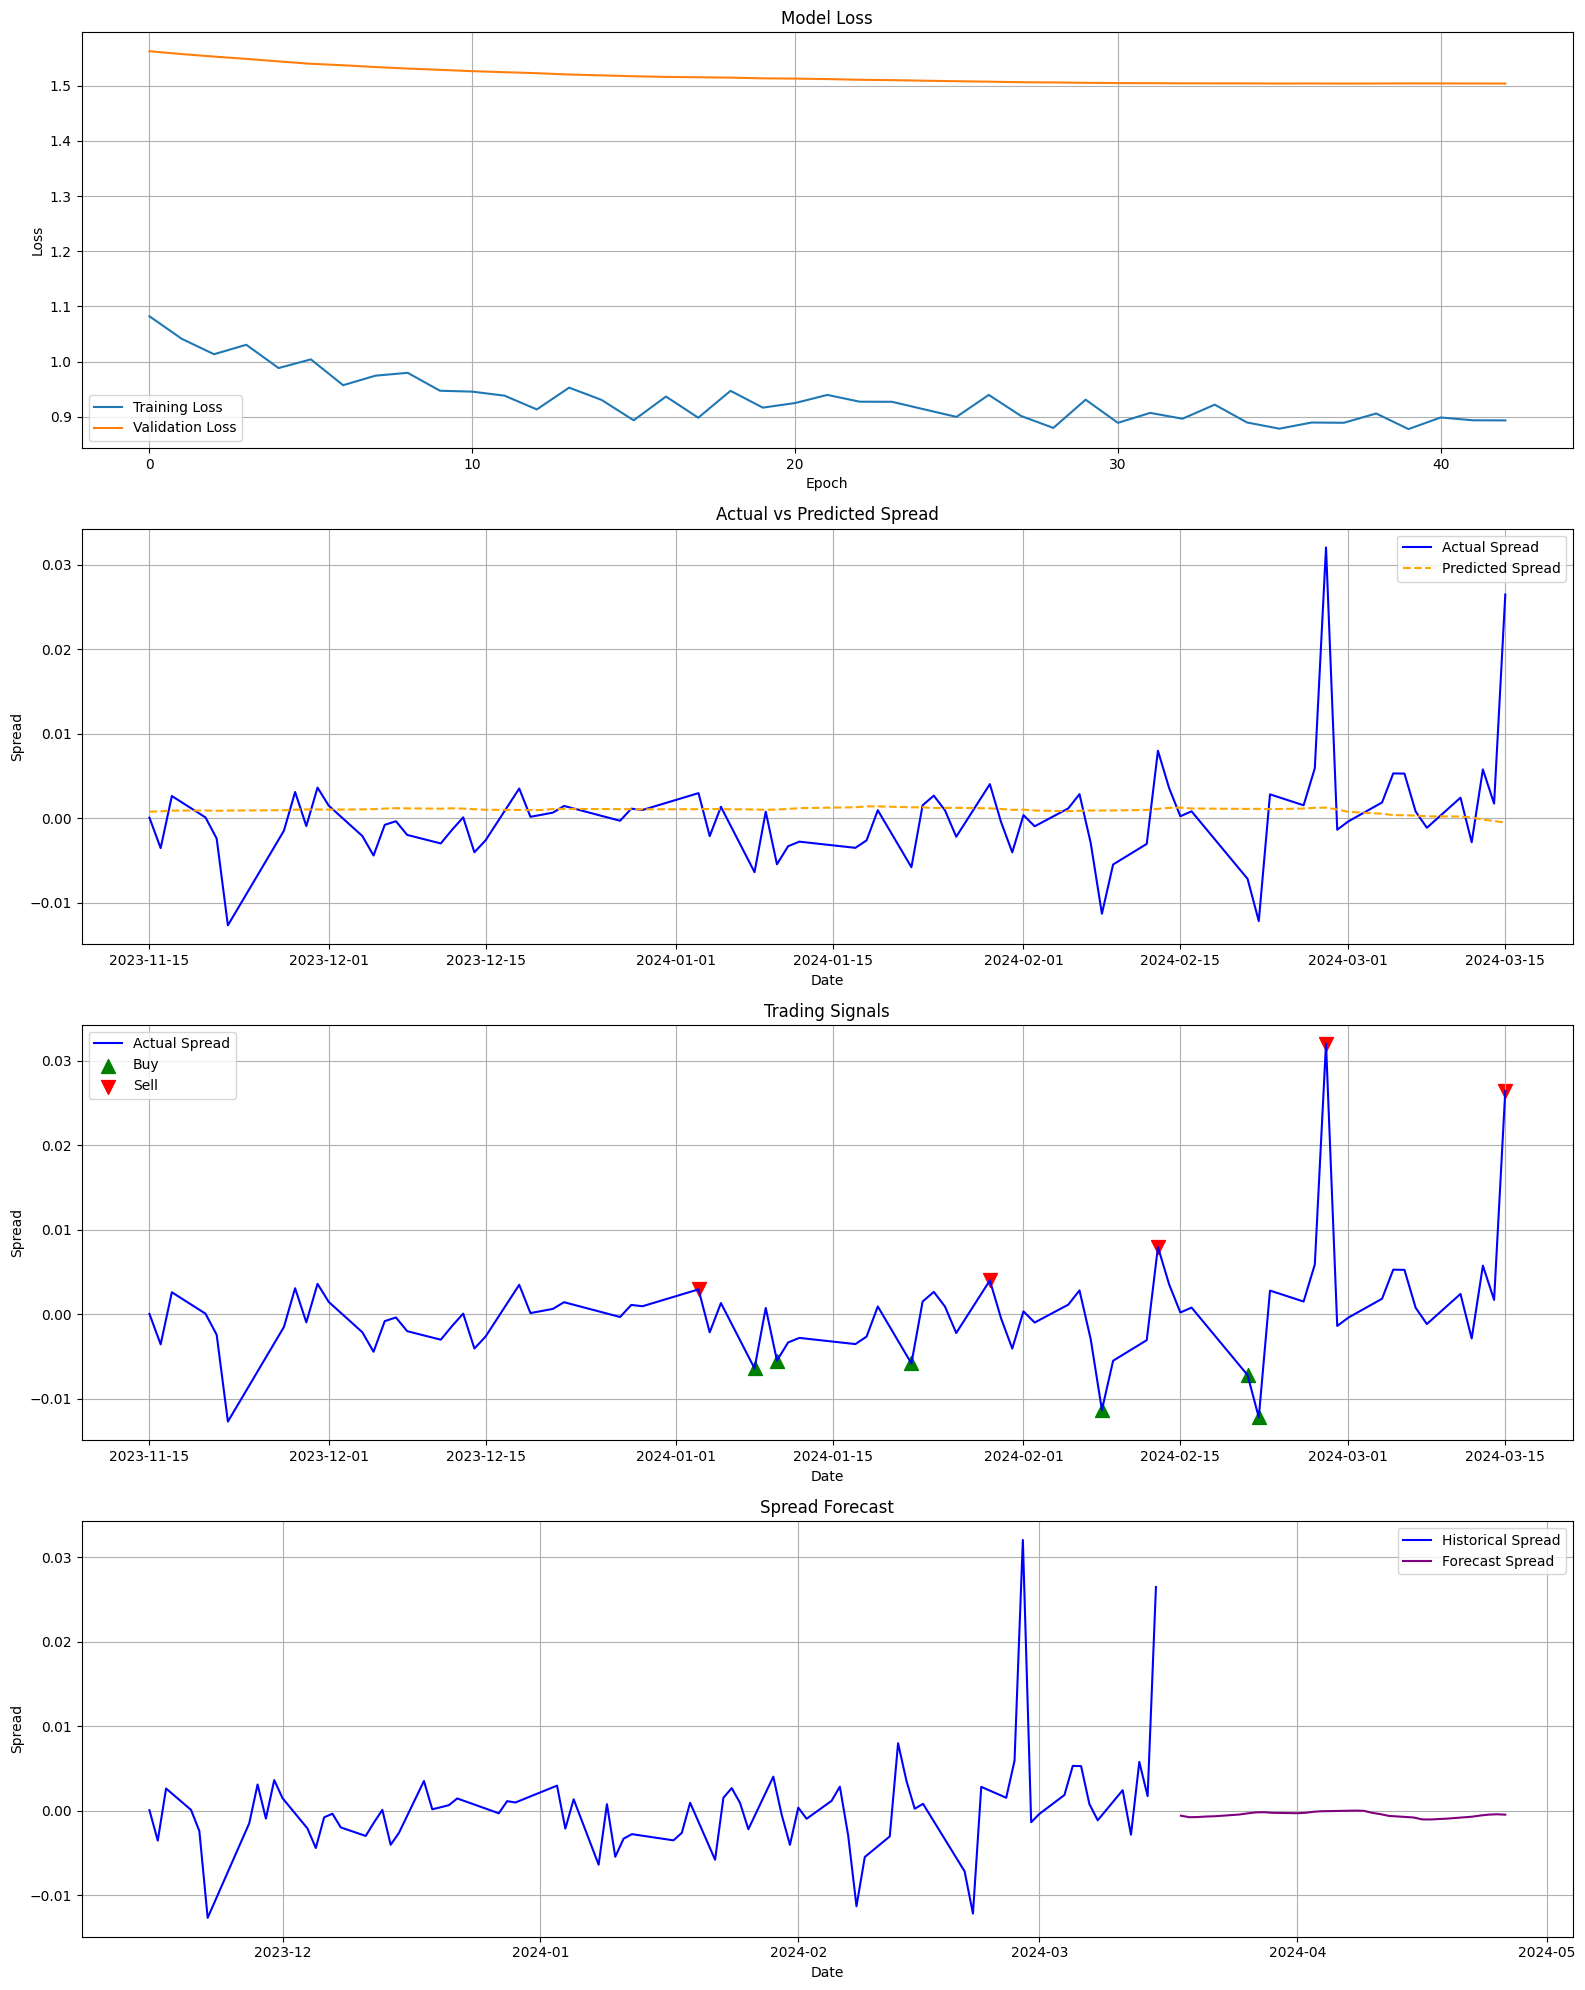

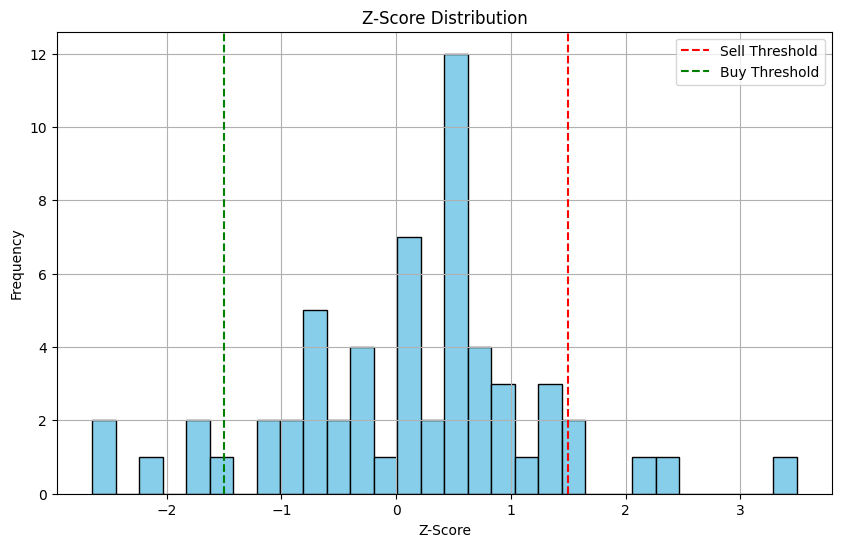


Strategy Evaluation:
Buy Signal Success Rate: 100.00%
Sell Signal Success Rate: 80.00%
Hold Signal Success Rate: 67.16%
Overall Success Rate: 101.85%
Buy Signals: 6
Sell Signals: 5
Hold Signals: 67

Forecast for the next 30 days:
            forecast_spread
date                       
2024-03-18        -0.000598
2024-03-19        -0.000775
2024-03-20        -0.000757
2024-03-21        -0.000694
2024-03-22        -0.000668
2024-03-25        -0.000460
2024-03-26        -0.000324
2024-03-27        -0.000202
2024-03-28        -0.000184
2024-03-29        -0.000258

Latest trading signal: SELL
Forecast-based signal: SELL (based on mean forecast vs last actual)


In [76]:
#!/usr/bin/env python
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import joblib
from datetime import datetime, timedelta

# Function to calculate RSI
def calculate_rsi(series, window=14):
    """Calculate RSI for a price series"""
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Function to get economic indicators
def get_economic_indicators(start_date, end_date):
    tickers = [
        "^GSPC",   # S&P 500
        "^VIX",    # Volatility Index
        "^TNX",    # 10-Year Treasury Yield
        "^FVX",    # 5-Year Treasury Yield
        "GC=F",    # Gold Futures
        "CL=F",    # Crude Oil Futures
        "GBPUSD=X" # GBP/USD Exchange Rate
    ]

    data = yf.download(tickers, start=start_date, end=end_date)
    data = data['Close']
    
    # Rename columns for clarity
    data.columns = ['SP500', 'VIX', 'TNX', 'FVX', 'GF', 'COF', 'GBPUSD']
    
    return data

# Function to convert pricing data to log returns
def convert_to_log_returns(data):
    log_returns = data.copy()

    # List of indicators to convert to log returns
    convert_tickers = ['SP500', 'GF', 'COF', 'GBPUSD']

    # Apply log returns conversion
    for ticker in convert_tickers:
        if ticker in log_returns.columns:
            log_returns[ticker] = np.log(log_returns[ticker] / log_returns[ticker].shift(1))

    # Drop the first row which will have NaN values due to the shift
    log_returns = log_returns.dropna()

    return log_returns

# Function to create sequences for LSTM
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []

    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])

    return np.array(X_seq), np.array(y_seq)

# Function to prepare data for LSTM
def prepare_data_for_lstm(spread_df, economic_indicators, sequence_length=20):
    # The spread_df now only contains the 'spread' column
    merged_df = spread_df.join(economic_indicators, how='inner')
    
    # Calculate additional features using just the spread
    merged_df['spread_ma5'] = spread_df['spread'].rolling(window=5).mean()
    merged_df['spread_ma20'] = spread_df['spread'].rolling(window=20).mean()
    merged_df['spread_volatility'] = spread_df['spread'].rolling(window=20).std()
    merged_df['rsi_spread'] = calculate_rsi(spread_df['spread'], window=14)
    
    # Drop rows with NaN values
    merged_df = merged_df.dropna()
    
    # Define features and target
    features = ['SP500', 'VIX', 'TNX', 'FVX', 'GF', 'COF', 'GBPUSD', 
                'spread_ma5', 'spread_ma20', 'spread_volatility', 'rsi_spread']
    target = ['spread']
    
    # Split data into training and testing sets
    train_size = int(len(merged_df) * 0.8)
    train_data = merged_df.iloc[:train_size]
    test_data = merged_df.iloc[train_size:]
    
    # Scale the data
    feature_scaler = StandardScaler()
    target_scaler = StandardScaler()
    
    feature_scaler.fit(train_data[features])
    target_scaler.fit(train_data[target])
    
    train_feature_scaled = feature_scaler.transform(train_data[features])
    train_target_scaled = target_scaler.transform(train_data[target])
    
    test_feature_scaled = feature_scaler.transform(test_data[features])
    test_target_scaled = target_scaler.transform(test_data[target])
    
    # Create sequences
    X_train, y_train = create_sequences(train_feature_scaled, train_target_scaled, sequence_length)
    X_test, y_test = create_sequences(test_feature_scaled, test_target_scaled, sequence_length)
    
    return X_train, X_test, y_train, y_test, feature_scaler, target_scaler, train_data, test_data, merged_df, features

# Function to build LSTM model
def build_lstm_model(X_train, y_train, X_test, y_test, lr=3.28920104987804e-05):
    n_features = X_train.shape[2]
    
    model = Sequential()
    model.add(LSTM(10, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], n_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(30, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stop],
        verbose=1
    )
    
    return model, history

# Function to generate trading signals
def generate_signals(model, test_data, feature_scaler, target_scaler, features, sequence_length=20, z_score_window=20, z_score_threshold=1.5):
    # Create sequences for prediction
    test_feature_scaled = feature_scaler.transform(test_data[features])
    X_test_seq = []
    
    for i in range(len(test_feature_scaled) - sequence_length):
        X_test_seq.append(test_feature_scaled[i:i+sequence_length])
    
    X_test_seq = np.array(X_test_seq)
    
    # Make predictions
    test_pred_scaled = model.predict(X_test_seq)
    test_pred = target_scaler.inverse_transform(test_pred_scaled)
    
    # Create DataFrame with predictions
    test_indices = test_data.index[sequence_length:]
    predictions_df = pd.DataFrame(
        data=test_pred,
        columns=['predicted_spread'],
        index=test_indices[:len(test_pred)]
    )
    
    # Add actual spread values
    predictions_df['actual_spread'] = test_data.loc[test_indices[:len(test_pred)], 'spread'].values
    
    # Calculate error and z-score
    predictions_df['error'] = predictions_df['actual_spread'] - predictions_df['predicted_spread']
    
    # Calculate rolling statistics for z-score
    rolling_mean = predictions_df['error'].rolling(window=z_score_window).mean()
    rolling_std = predictions_df['error'].rolling(window=z_score_window).std()
    predictions_df['z_score'] = (predictions_df['error'] - rolling_mean) / rolling_std
    
    # Generate signals
    predictions_df['signal'] = 0
    predictions_df.loc[predictions_df['z_score'] <= -z_score_threshold, 'signal'] = 1    # Buy when actual is lower than predicted
    predictions_df.loc[predictions_df['z_score'] >= z_score_threshold, 'signal'] = -1    # Sell when actual is higher than predicted
    
    return predictions_df

# Function to evaluate trading strategy
def evaluate_strategy(signals_df, forward_window=5):
    eval_df = signals_df.copy()
    eval_df['signal'] = eval_df['signal'].fillna(0)
    
    # Calculate forward spread change
    eval_df['forward_spread_change'] = eval_df['actual_spread'].shift(-forward_window) - eval_df['actual_spread']
    
    # Define success criteria
    buy_success = ((eval_df['signal'] == 1) & (eval_df['forward_spread_change'] > 0))
    sell_success = ((eval_df['signal'] == -1) & (eval_df['forward_spread_change'] < 0))
    hold_success = ((eval_df['signal'] == 0) & 
                   (abs(eval_df['forward_spread_change']) < eval_df['forward_spread_change'].std() * 0.5))
    
    # Calculate success rates
    buy_success_rate = buy_success.sum() / (eval_df['signal'] == 1).sum() if (eval_df['signal'] == 1).sum() > 0 else 0
    sell_success_rate = sell_success.sum() / (eval_df['signal'] == -1).sum() if (eval_df['signal'] == -1).sum() > 0 else 0
    hold_success_rate = hold_success.sum() / (eval_df['signal'] == 0).sum() if (eval_df['signal'] == 0).sum() > 0 else 0
    
    overall_success = buy_success.sum() + sell_success.sum() + hold_success.sum()
    total_signals = len(eval_df.dropna())
    overall_success_rate = overall_success / total_signals if total_signals > 0 else 0
    
    evaluation_metrics = {
        'buy_success_rate': buy_success_rate,
        'sell_success_rate': sell_success_rate,
        'hold_success_rate': hold_success_rate,
        'overall_success_rate': overall_success_rate,
        'buy_count': (eval_df['signal'] == 1).sum(),
        'sell_count': (eval_df['signal'] == -1).sum(),
        'hold_count': (eval_df['signal'] == 0).sum()
    }
    
    return evaluation_metrics, eval_df

# Function to forecast future spread
# def forecast_future_spread(model, latest_data, feature_scaler, target_scaler, features, sequence_length=20, forecast_days=30):
#     # Get the latest sequence
#     latest_feature_scaled = feature_scaler.transform(latest_data[features].tail(sequence_length))
#     latest_sequence = latest_feature_scaled.reshape(1, sequence_length, len(features))
    
#     # Initialize arrays to store forecasts
#     forecast_dates = []
#     forecast_values = []
    
#     # Starting point for forecasting
#     current_date = latest_data.index[-1]
#     current_sequence = latest_sequence.copy()
    
#     # Forecast for the specified number of days
#     for i in range(forecast_days):
#         # Get the next date (skip weekends)
#         current_date = current_date + timedelta(days=1)
#         while current_date.weekday() > 4:  # Skip Saturday (5) and Sunday (6)
#             current_date = current_date + timedelta(days=1)
        
#         # Predict the next spread value
#         next_prediction_scaled = model.predict(current_sequence, verbose=0)
#         next_prediction = target_scaler.inverse_transform(next_prediction_scaled)[0][0]
        
#         # Store the forecast
#         forecast_dates.append(current_date)
#         forecast_values.append(next_prediction)
        
#         # Update the sequence for the next prediction
#         # This is a simplification as we don't have actual future feature values
#         # In a real implementation, you would need to update all features
        
#         # For now, we'll shift the sequence and add the new prediction
#         # Note: This is a simplified approach and assumes the relationship between 
#         # features and spread remains constant
#         next_sequence = np.roll(current_sequence[0], -1, axis=0)
#         next_sequence[-1] = next_sequence[-2]  # Copy the last known feature values
#         current_sequence = next_sequence.reshape(1, sequence_length, len(features))
    
#     # Create a DataFrame with the forecasts
#     forecast_df = pd.DataFrame({
#         'date': forecast_dates,
#         'forecast_spread': forecast_values
#     })
#     forecast_df.set_index('date', inplace=True)
    
#     return forecast_df

def forecast_future_spread(model, latest_data, feature_scaler, target_scaler, features, sequence_length=20, forecast_days=30):
    # Get the latest sequence
    latest_feature_scaled = feature_scaler.transform(latest_data[features].tail(sequence_length))
    latest_sequence = latest_feature_scaled.reshape(1, sequence_length, len(features))
    
    forecast_dates = []
    forecast_values = []
    
    current_date = latest_data.index[-1]
    current_sequence = latest_sequence.copy()
    
    for i in range(forecast_days):
        # Predict the next spread value
        next_prediction_scaled = model.predict(current_sequence, verbose=0)
        next_prediction = target_scaler.inverse_transform(next_prediction_scaled)[0][0]
        
        # Store the forecast
        current_date += timedelta(days=1)
        while current_date.weekday() > 4:  # Skip weekends
            current_date += timedelta(days=1)
            
        forecast_dates.append(current_date)
        forecast_values.append(next_prediction)
        
        # Update sequence by shifting left and adding the new prediction
        next_sequence = np.roll(current_sequence[0], -1, axis=0)
        next_sequence[-1, -1] = next_prediction  # Only updating spread value
        current_sequence = next_sequence.reshape(1, sequence_length, len(features))
    
    forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast_spread': forecast_values})
    forecast_df.set_index('date', inplace=True)
    
    return forecast_df





# Main function to run the entire pipeline
def run_spread_prediction_pipeline(spread_df, start_date, end_date, sequence_length=20, z_score_window=20, z_score_threshold=1.5, forecast_days=30):
    # Get economic indicators
    economic_indicators = get_economic_indicators(start_date, end_date)
    economic_indicators = convert_to_log_returns(economic_indicators)
    
    # Prepare data for LSTM
    X_train, X_test, y_train, y_test, feature_scaler, target_scaler, train_data, test_data, merged_df, features = prepare_data_for_lstm(
        spread_df, economic_indicators, sequence_length
    )
    
    # Build and train LSTM model
    model, history = build_lstm_model(X_train, y_train, X_test, y_test)
    
    # Generate trading signals
    signals_df = generate_signals(model, test_data, feature_scaler, target_scaler, features, sequence_length, z_score_window, z_score_threshold)
    
    # Evaluate strategy
    evaluation_metrics, eval_df = evaluate_strategy(signals_df)
    
    # Forecast future spread
    forecast_df = forecast_future_spread(model, merged_df, feature_scaler, target_scaler, features, sequence_length, forecast_days)
    
    # Save model and scalers
    model.save("spread_prediction_model.h5")
    joblib.dump(feature_scaler, "feature_scaler.pkl")
    joblib.dump(target_scaler, "target_scaler.pkl")
    
    # Plot results
    plot_results(history, signals_df, forecast_df, z_score_threshold)
    
    # Print evaluation metrics
    print("\nStrategy Evaluation:")
    print(f"Buy Signal Success Rate: {evaluation_metrics['buy_success_rate']:.2%}")
    print(f"Sell Signal Success Rate: {evaluation_metrics['sell_success_rate']:.2%}")
    print(f"Hold Signal Success Rate: {evaluation_metrics['hold_success_rate']:.2%}")
    print(f"Overall Success Rate: {evaluation_metrics['overall_success_rate']:.2%}")
    print(f"Buy Signals: {evaluation_metrics['buy_count']}")
    print(f"Sell Signals: {evaluation_metrics['sell_count']}")
    print(f"Hold Signals: {evaluation_metrics['hold_count']}")
    
    return model, feature_scaler, target_scaler, signals_df, forecast_df, evaluation_metrics

# Function to plot results
def plot_results(history, signals_df, forecast_df, z_score_threshold):
    plt.figure(figsize=(16, 20))
    
    # Plot training history
    plt.subplot(4, 1, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Plot actual vs predicted spread
    plt.subplot(4, 1, 2)
    plt.plot(signals_df['actual_spread'], label='Actual Spread', color='blue')
    plt.plot(signals_df['predicted_spread'], label='Predicted Spread', color='orange', linestyle='--')
    plt.title('Actual vs Predicted Spread')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.legend()
    plt.grid(True)
    
    # Plot trading signals
    plt.subplot(4, 1, 3)
    plt.plot(signals_df['actual_spread'], label='Actual Spread', color='blue')
    
    # Plot buy signals
    buy_signals = signals_df[signals_df['signal'] == 1]
    if not buy_signals.empty:
        plt.scatter(buy_signals.index, buy_signals['actual_spread'],
                color='green', marker='^', s=100, label='Buy')
    
    # Plot sell signals
    sell_signals = signals_df[signals_df['signal'] == -1]
    if not sell_signals.empty:
        plt.scatter(sell_signals.index, sell_signals['actual_spread'],
                color='red', marker='v', s=100, label='Sell')
    
    plt.title('Trading Signals')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.legend()
    plt.grid(True)
    
    # Plot forecast
    plt.subplot(4, 1, 4)
    plt.plot(signals_df['actual_spread'], label='Historical Spread', color='blue')
    plt.plot(forecast_df['forecast_spread'], label='Forecast Spread', color='purple')
    plt.title('Spread Forecast')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Plot z-score distribution
    plt.figure(figsize=(10, 6))
    plt.hist(signals_df['z_score'].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.axvline(x=z_score_threshold, color='red', linestyle='--', label='Sell Threshold')
    plt.axvline(x=-z_score_threshold, color='green', linestyle='--', label='Buy Threshold')
    plt.title('Z-Score Distribution')
    plt.xlabel('Z-Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to demonstrate how to use the pipeline
def example_usage():
    # Load your spread data
    # This is just a placeholder, replace with your actual data loading code
    spread_df = training_spread_df
    
    # Example of running the pipeline
    model, feature_scaler, target_scaler, signals_df, forecast_df, evaluation_metrics = run_spread_prediction_pipeline(
        spread_df, 
        start_date='2022-01-31', 
        end_date='2024-03-18',
        sequence_length=20,
        z_score_window=20,
        z_score_threshold=1.5,
        forecast_days=30
    )
    
    # Print forecasting results
    print("\nForecast for the next 30 days:")
    print(forecast_df.head(10))
    
    # Latest trading signal
    latest_signal = signals_df['signal'].iloc[-1]
    signal_text = "BUY" if latest_signal == 1 else "SELL" if latest_signal == -1 else "HOLD"
    print(f"\nLatest trading signal: {signal_text}")
    
    # Forecast signal
    # This is a simplified approach - in practice, you might use the forecast to generate signals
    forecast_mean = forecast_df['forecast_spread'].mean()
    last_actual = signals_df['actual_spread'].iloc[-1]
    forecast_signal = "BUY" if forecast_mean > last_actual else "SELL"
    print(f"Forecast-based signal: {forecast_signal} (based on mean forecast vs last actual)")

# If you want to use the code directly
if __name__ == "__main__":
    example_usage()